In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio

In [2]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
dset1['PCT_CROP_area']=(dset1['PCT_CROP']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']*(dset1['PCT_CROP']/100)

TotCropArea_diff_2090= (dset1['PCT_CROP_area'].sel(time=2090)) - (dset1['PCT_CROP_area'].sel(time=2015))
TotCFTArea_diff_2090 = (dset1['PCT_CFT_area'].sel(time=2090).sum('cft')) - (dset1['PCT_CFT_area'].sel(time=2015).sum('cft')) 

# Total area without sugarcane in 2090 and 2015
dset1_without_sugarcane_2090 = (dset1['PCT_CFT_area'].sum('cft').sel(time=2090))- ((dset1['PCT_CFT_area'].isel(cft=52).sel(time=2090)))
dset1_without_sugarcane_2015 = (dset1['PCT_CFT_area'].sum('cft').sel(time=2015))- ((dset1['PCT_CFT_area'].isel(cft=52).sel(time=2015)))
#Difference in sugarcane area
TotCFTArea_diff_2090_wo_sugarcane = ((dset1['PCT_CFT_area'][dict(cft=52)].sel(time=2090))-(dset1['PCT_CFT_area'][dict(cft=52)].sel(time=2015)))       # diff in sugarcane area

##check why adding and summing & summing and adding are not the same


<xarray.DataArray 'PCT_CFT_area' ()>
array(40130.0144179)
Coordinates:
    cft      int32 60
    time     int32 2090
<xarray.DataArray 'PCT_CFT_area' ()>
array(5053265.02480437)
Coordinates:
    cft      int32 67
<xarray.DataArray 'PCT_CFT_area' ()>
array(5075931.93196875)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_CFT_area' ()>
array(5093395.03922227)
Coordinates:
    time     int32 2090


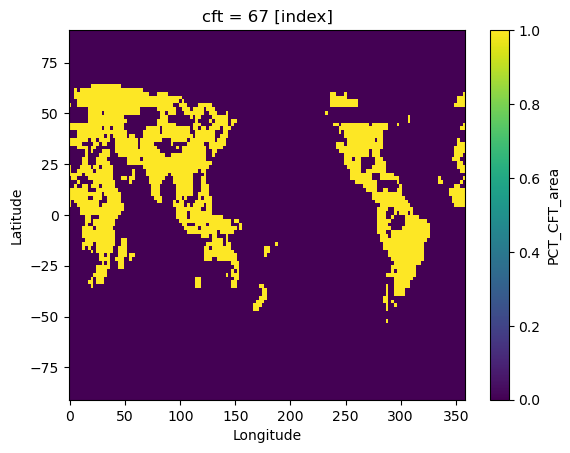

In [7]:
print(dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum())
mask = TotCFTArea_diff_2090_wo_sugarcane > 0
masked_data = TotCFTArea_diff_2090_wo_sugarcane.where(mask)
print(masked_data.sum())
mask.plot()
a = (dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)])+ masked_data
print(a.sum())
print((dset1['PCT_CFT_area'].loc[dict(cft=60, time=2090)].sum())+masked_data.sum())

In [ ]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP_area'].sel(time=2015).plot()
axs.coastlines(linewidth=1)
plt.text(0.8, -0.3, dset1['PCT_CROP_area'].sel(time=2015).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('totalarea_2015')

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1_without_sugarcane_2015.plot()
plt.title('area without sugarcane_2015')
plt.text(0.8, -0.3, dset1_without_sugarcane_2015.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=60, time=2015)].plot()
axs.coastlines(linewidth=1)
plt.title('Corn-2015')

plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=60, time=2015)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].loc[dict(cft=52, time=2015)].plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].loc[dict(cft=52, time=2015)].sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('sugarcane-2015')
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sel(time=2015).sum('cft').plot()
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sel(time=2015).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
plt.title('Sum of CFTS-2015')
axs.coastlines(linewidth=1)